In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import csv, sqlite3
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb  # Import the XGBoost library
from sklearn.pipeline import Pipeline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

# Suppress specific warnings or all warnings
warnings.filterwarnings('ignore')

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 6.5 MB/s eta 0:00:0000:010:01m
Note: you may need to restart the kernel to use updated packages.


# House Pricing Dataset 

## Overview
Title: House Prices: Advanced Regression Techniques
Source: Kaggle House Prices Dataset
Goal: Predict the sale prices of houses based on various features.
Description
The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. This dataset is often used to explore advanced regression techniques, feature engineering, and model evaluation.

## Files
* train.csv: The training dataset with features and the target variable (SalePrice).
* test.csv: The test dataset with features only, used for making predictions.
* data_description.txt: Detailed description of each feature in the dataset.
* sample_submission.csv: A sample submission file in the correct format.

## Key Features

The dataset includes numerous features describing the properties. Here is a summary of some key features:

<div style="display: flex;">

<div style="flex: 1; padding: 10px;">
    
| Feature            | Description                                                   |
|--------------------|---------------------------------------------------------------|
| `Id`               | Unique identifier for each property                           |
| `MSSubClass`       | The building class                                            |
| `MSZoning`         | The general zoning classification                             |
| `LotFrontage`      | Linear feet of street connected to the property               |
| `LotArea`          | Lot size in square feet                                       |
| `Street`           | Type of road access to the property                           |
| `Alley`            | Type of alley access to the property                          |
| `LotShape`         | General shape of property                                     |
| `LandContour`      | Flatness of the property                                      |
| `Utilities`        | Type of utilities available                                   |
| `LotConfig`        | Lot configuration                                             |
| `LandSlope`        | Slope of property                                             |
| `Neighborhood`     | Physical locations within Ames city limits                    |
| `Condition1`       | Proximity to main road or railroad                            |
| `Condition2`       | Proximity to main road or railroad (if a second is present)   |
| `BldgType`         | Type of dwelling                                             |
| `HouseStyle`       | Style of dwelling                                             |
| `OverallQual`      | Overall material and finish quality                           |
| `OverallCond`      | Overall condition rating                                      |
| `YearBuilt`        | Original construction date                                    |
| `YearRemodAdd`     | Remodel date                                                  |
| `RoofStyle`        | Type of roof                                                  |
| `RoofMatl`         | Roof material                                                 |
| `Exterior1st`      | Exterior covering on house                                    |
| `Exterior2nd`      | Exterior covering on house (if more than one material)        |
| `MasVnrType`       | Masonry veneer type                                           |
| `MasVnrArea`       | Masonry veneer area in square feet                            |
| `ExterQual`        | Exterior material quality                                     |
| `ExterCond`        | Present condition of the material on the exterior             |
| `Foundation`       | Type of foundation                                            |
| `BsmtQual`         | Height of the basement                                       |
| `BsmtCond`         | General condition of the basement                             |
| `BsmtExposure`     | Walkout or garden level basement walls                        |
| `BsmtFinType1`     | Quality of basement finished area                             |
| `BsmtFinSF1`       | Type 1 finished square feet                                   |
| `BsmtFinType2`     | Quality of second finished area (if present)                  |
| `BsmtFinSF2`       | Type 2 finished square feet                                   |
| `BsmtUnfSF`        | Unfinished square feet of basement                            |
| `TotalBsmtSF`      | Total square feet of basement area                            |
</div>

<div style="flex: 1; padding: 10px;">

| Feature            | Description                                                   |
|--------------------|---------------------------------------------------------------|
| `Heating`          | Type of heating                                               |
| `HeatingQC`        | Heating quality and condition                                 |
| `CentralAir`       | Central air conditioning (Y/N)                                |
| `Electrical`       | Electrical system                                             |
| `1stFlrSF`         | First-floor square feet                                       |
| `2ndFlrSF`         | Second-floor square feet                                      |
| `LowQualFinSF`     | Low-quality finished square feet (all floors)                 |
| `GrLivArea`        | Above grade (ground) living area square feet                  |
| `BsmtFullBath`     | Basement full bathrooms                                       |
| `BsmtHalfBath`     | Basement half bathrooms                                       |
| `FullBath`         | Full bathrooms above grade                                    |
| `HalfBath`         | Half baths above grade                                        |
| `BedroomAbvGr`     | Number of bedrooms above basement level                       |
| `KitchenAbvGr`     | Number of kitchens                                            |
| `KitchenQual`      | Kitchen quality                                               |
| `TotRmsAbvGrd`     | Total rooms above grade (does not include bathrooms)          |
| `Functional`       | Home functionality rating                                     |
| `Fireplaces`       | Number of fireplaces                                          |
| `FireplaceQu`      | Fireplace quality                                             |
| `GarageType`       | Garage location                                               |
| `GarageYrBlt`      | Year garage was built                                         |
| `GarageFinish`     | Interior finish of the garage                                 |
| `GarageCars`       | Size of garage in car capacity                                |
| `GarageArea`       | Size of garage in square feet                                 |
| `GarageQual`       | Garage quality                                                |
| `GarageCond`       | Garage condition                                              |
| `PavedDrive`       | Paved driveway (Y/N)                                          |
| `WoodDeckSF`       | Wood deck area in square feet                                 |
| `OpenPorchSF`      | Open porch area in square feet                                |
| `EnclosedPorch`    | Enclosed porch area in square feet                            |
| `3SsnPorch`        | Three-season porch area in square feet                        |
| `ScreenPorch`      | Screen porch area in square feet                              |
| `PoolArea`         | Pool area in square feet                                      |
| `PoolQC`           | Pool quality                                                  |
| `Fence`            | Fence quality                                                 |
| `MiscFeature`      | Miscellaneous feature not covered in other categories         |
| `MiscVal`          | Value of miscellaneous feature                                |
| `MoSold`           | Month sold                                                    |
| `YrSold`           | Year sold                                                     |
| `SaleType`         | Type of sale                                                  |
| `SaleCondition`    | Condition of sale                                             |
| `SalePrice`        | Sale price of the property                                    |

</div>
    
</div>
This dataset is great for practicing data preprocessing, feature engineering, and building regression models. You can find the dataset and more details on the Kaggle competition page: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).


## Load data and overview

In [3]:
custom_palette = sns.color_palette("pastel", 10)
sns.set_palette(custom_palette)
color1 = sns.color_palette("pastel")[2]
color2 = sns.color_palette("pastel")[3]

In [4]:
# Load datasets
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

# Inspect the first few rows of the training dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Inspect the first few rows of the training dataset
print(f"Size of train data is: {train_data.shape} and test: {test_data.shape}")

Size of train data is: (1460, 81) and test: (1459, 80)


In [6]:
# Summary statistics of the training dataset
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Summary statistics of the training dataset
train_data.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## FEATURE ENGENEERING

Add a feature that states for extraoridinary equipment 

In [9]:
# Define criteria for extraordinary features
extraordinary_features = ['PoolArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fireplaces']

# Create luxury_addon variable based on the presence of extraordinary features

datasets = [train_data, test_data]

for dataset in datasets:
    dataset['extraordinary'] = 0  # Initialize with 0
    dataset.loc[dataset['PoolArea'] > 0, 'extraordinary'] += 1  # Add 1 if PoolArea > 0
    dataset.loc[dataset['WoodDeckSF'] > 0, 'extraordinary'] += 1  # Add 1 if WoodDeckSF > 0
    dataset.loc[dataset['OpenPorchSF'] > 0, 'extraordinary'] += 1  # Add 1 if OpenPorchSF > 0
    dataset.loc[dataset['EnclosedPorch'] > 0, 'extraordinary'] += 1  # Add 1 if EnclosedPorch > 0
    dataset.loc[dataset['3SsnPorch'] > 0, 'extraordinary'] += 1  # Add 1 if 3SsnPorch > 0
    dataset.loc[dataset['ScreenPorch'] > 0, 'extraordinary'] += 1  # Add 1 if ScreenPorch > 0
    dataset.loc[dataset['Fireplaces'] > 0, 'extraordinary'] += 1  # Add 1 if Fireplaces > 0

# Print the first few rows to verify
train_data[['PoolArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fireplaces', 'extraordinary']].head()

,PoolArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fireplaces,extraordinary
0,0,0,61,0,0,0,0,1
1,0,298,0,0,0,0,1,2
2,0,0,42,0,0,0,1,2
3,0,0,35,272,0,0,1,3
4,0,192,84,0,0,0,1,3


# EDA

## FEATURES SELECTION

Housing dataset contains a wide set of features, which is hard to track at the beginning. Thus, selection of important features for sale pricing prediction will be made in the first step. There are several methods to reduce the feature number:

* **Correlation Matrix and Low Variance**: Remove redundant and irrelevant features.
* **RFE and Feature Importance**: Select the most important features using model-based methods.
* **PCA**: Transform features into principal components that capture the maximum variance

### Remove highly correlated features and low variance numerical features

There are various techniques for feature selection and libraries to make so. Here are some of them:

1. scikit-learn

    1. **Filter Methods**: These methods select features based on their statistical properties, such as correlation with the target variable or their variance. Examples include:

        * SelectKBest: Selects the top k features based on univariate statistical tests.
        * SelectPercentile: Selects features based on a percentile of the highest scoring features.
        * VarianceThreshold: Removes features with low variance.

    2. **Wrapper Methods**: These methods evaluate the performance of different subsets of features using a predictive model. Examples include:

        * Recursive Feature Elimination (RFE): Iteratively removes the weakest feature(s) until the desired number of features is reached.
        * Recursive Feature Addition (RFA): Iteratively adds the most important feature(s) until the desired number of features is reached.

    3. **Embedded Methods**: (pentltization) These methods integrate feature selection into the model training process. Examples include:

        * Lasso (L1) regularization: Penalizes the absolute size of the coefficients, forcing some of them to be exactly zero.
        * Decision Trees: Some tree-based models like Random Forests or Gradient Boosted Trees have built-in feature importance measures.
    
    4. **SelectFromModel**: Selects features based on the importance weights of a model (e.g., coefficients of a linear model or feature importances of a tree-based model).

2. feature-engine
    
   Feature-engine is a library for feature engineering and selection that integrates well with scikit-learn.

3. mlxtend

    mlxtend (Machine Learning Extensions) is a library that provides additional tools and extensions for data analysis and machine learning, including feature selection methods.

4. dmba
    
    The dmba package, which stands for "Data Mining for Business Analytics," is a Python library that provides tools for teaching and learning data mining and business analytics. It is designed to accompany the textbook "Data Mining for Business Analytics," authored by Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. The package offers a variety of utilities and functions that are particularly useful for educational purposes and practical applications in business analytics.

   * **Stepwise Regression**

    It is particularly useful when there are many potential predictors and you want to find a subset that best explains the variation in the response variable. The process can either be a:
        * forward selection,
        * backward elimination
        * stepwise elimination - combination of both (bidirectional elimination).

   > Criteria for Adding or Removing Variables:
            * AIC (Akaike Information Criterion): A measure of the relative quality of a statistical model for a given set of data.
            * BIC (Bayesian Information Criterion): Similar to AIC, but includes a penalty for the number of parameters in the model.
            * p-values: In hypothesis testing, variables are often added or removed based on the statistical significance of their coefficients.

    
In this code some of them will be tested, starting from sci-kit learn and dbma. 
Let make VarianceThreshold and remove highly correlated features:

In [10]:
from sklearn.feature_selection import VarianceThreshold

# Select numeric columns
numeric_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Convert data types to float (if necessary)
train_data[numeric_columns] = train_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Remove features with low variance
selector = VarianceThreshold(threshold=0.1)  # Adjust threshold as needed
train_data_high_variance = selector.fit_transform(train_data[numeric_columns])

# Get the names of the remaining features
high_variance_columns = numeric_columns[selector.get_support()]

# Convert back to DataFrame
train_data_high_variance_df = pd.DataFrame(train_data_high_variance, columns=high_variance_columns)

# Calculate the correlation matrix
correlation_matrix = train_data_high_variance_df.corr()

# Identify highly correlated features
high_corr_threshold = 0.8
high_corr_pairs = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            print(f"{colname_i} and {colname_j} are highly correlated. Second removed")
            if colname_i not in high_corr_pairs:
                high_corr_pairs.add(colname_j)
               
            
print("\n\n")    
print(high_corr_pairs)

# Remove highly correlated features
train_data_preproc = train_data_high_variance_df.drop(columns=high_corr_pairs)

# Print the remaining columns
print("Remaining columns after removing low variance and highly correlated features:")
print(train_data_preproc.columns)     

1stFlrSF and TotalBsmtSF are highly correlated. Second removed
TotRmsAbvGrd and GrLivArea are highly correlated. Second removed
GarageYrBlt and YearBuilt are highly correlated. Second removed
GarageArea and GarageCars are highly correlated. Second removed



{'GarageCars', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF'}
Remaining columns after removing low variance and highly correlated features:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'extraordinary'],
      dtype='object')


In [11]:
train_data_preproc = train_data_preproc.join(train_data[categorical_columns])

In [12]:
train_data_preproc.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'extraordinary', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageTy

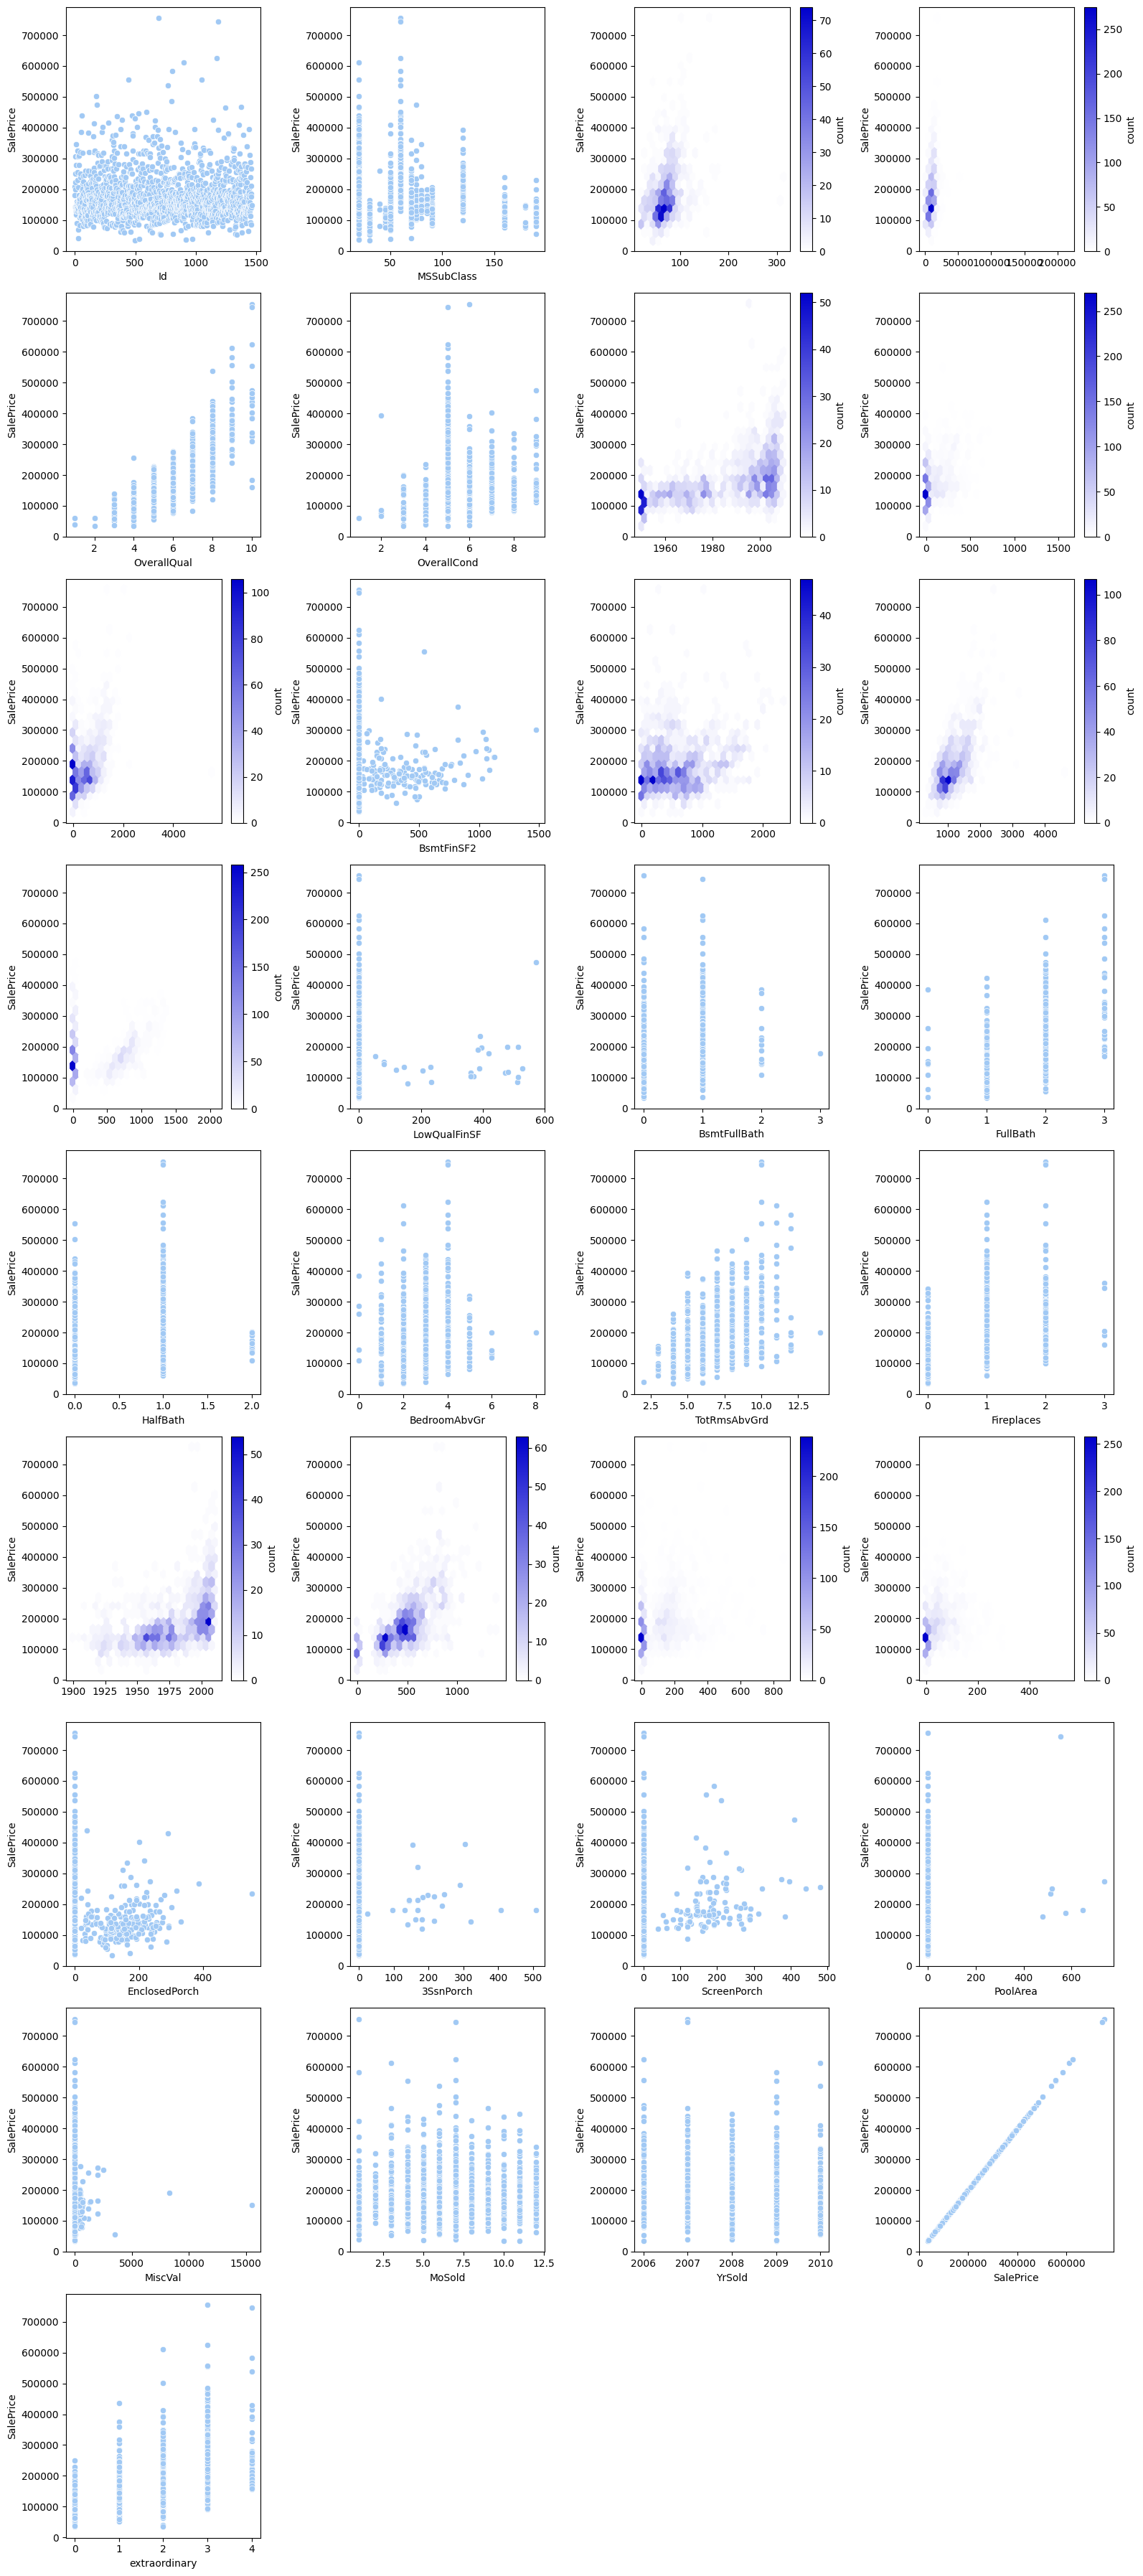

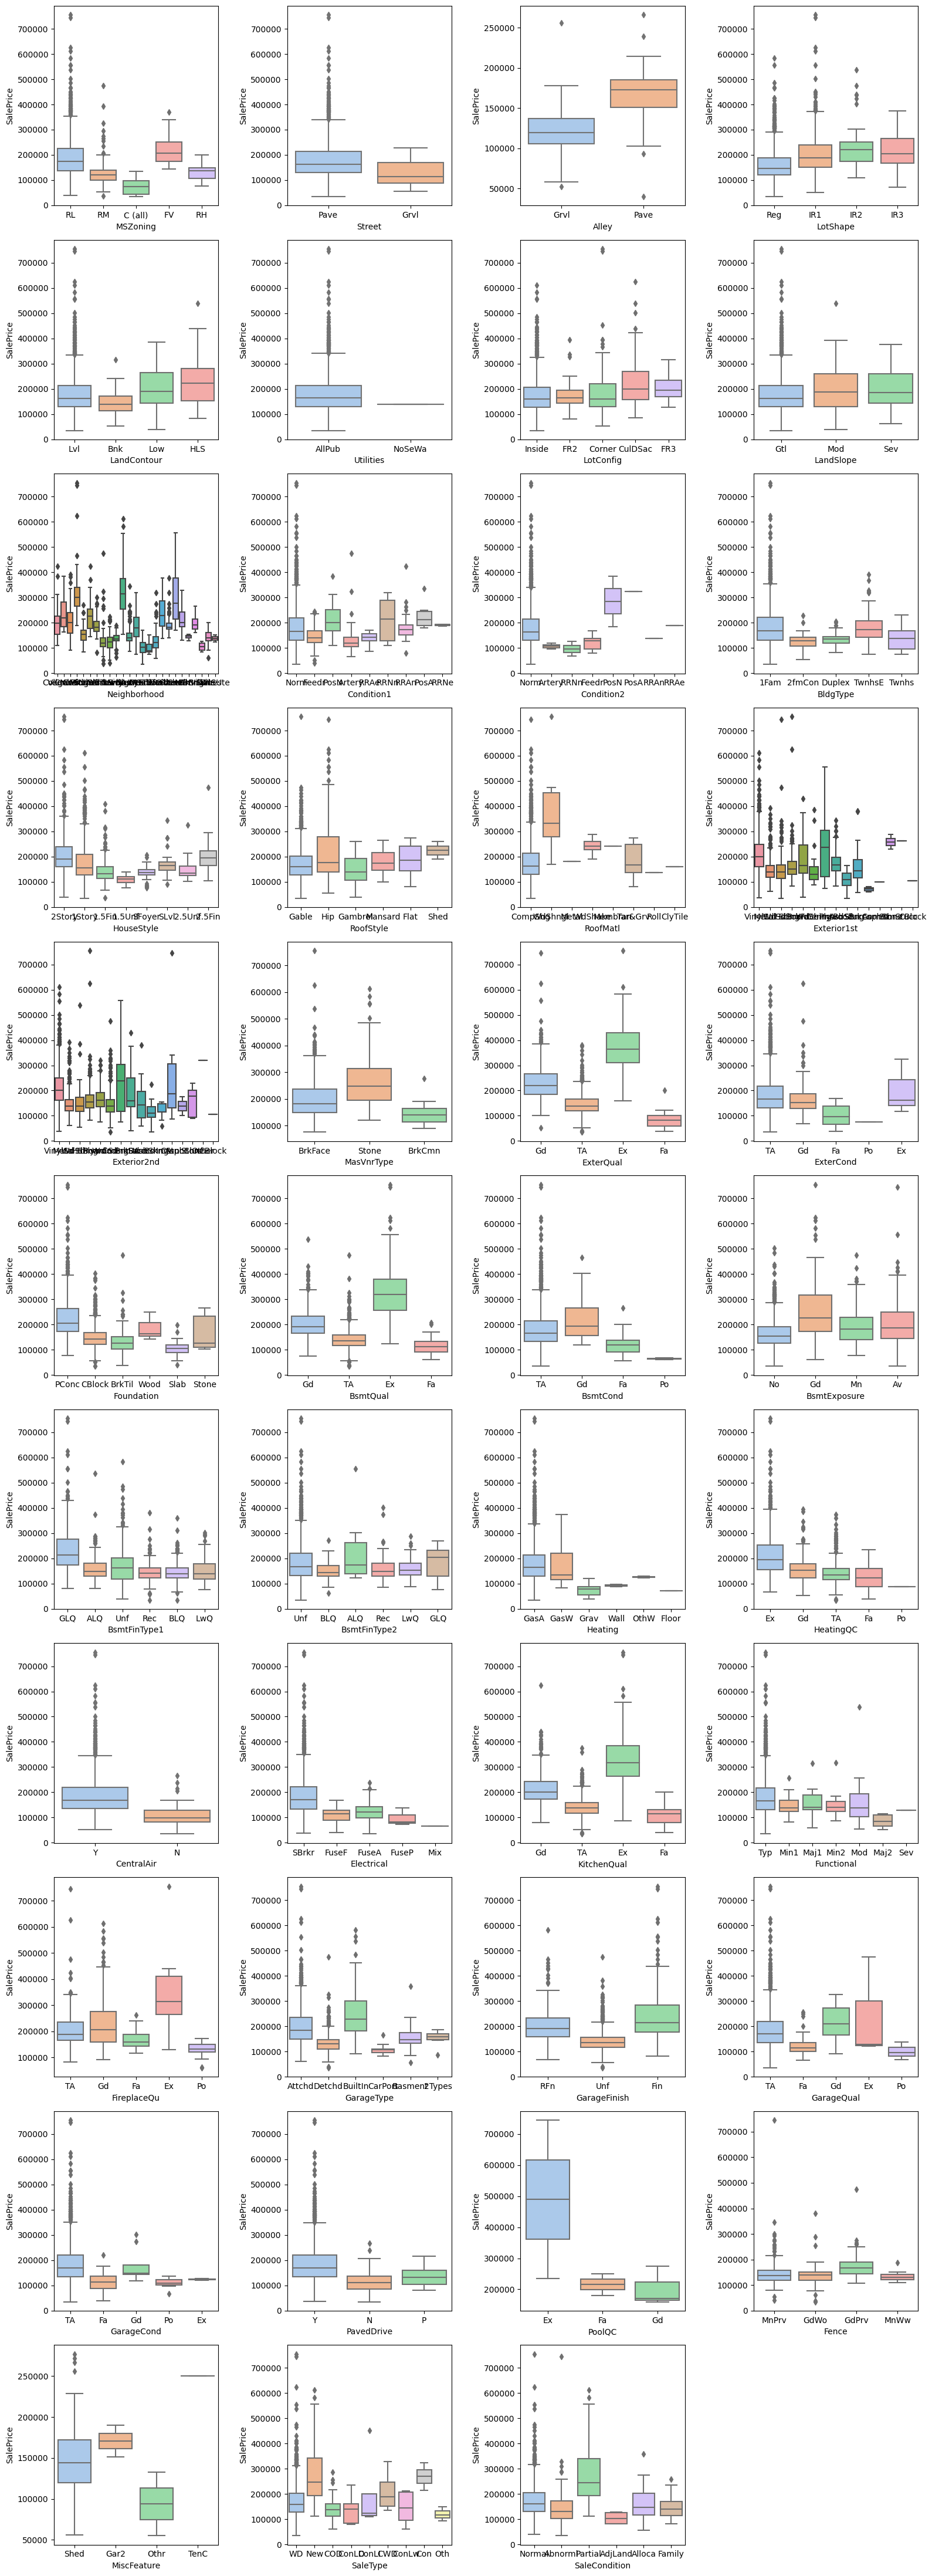

In [13]:
from matplotlib.colors import LinearSegmentedColormap

make_plots = 1

colors = [(1, 1, 1),  (0,0.0,0.8) ]  # White to blue
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

if(make_plots):
    # Scatter plots between numerical variables and 'SalePrice'
    numerical_columns = train_data_preproc.select_dtypes(include=['int64', 'float64']).columns
    num_cols_count = len(numerical_columns)
    num_plots_per_row = 4
    num_rows = (num_cols_count + num_plots_per_row - 1) // num_plots_per_row

    hex_list = ['LotFrontage','LotArea','YearRemodAdd',"MasVnrArea",'BsmtUnfSF', 'BsmtFinSF1','1stFlrSF', '2ndFlrSF',  'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF' ]

    plt.figure(figsize=(num_plots_per_row * 4, num_rows * 4))
    for i, col in enumerate(numerical_columns):
        plt.subplot(num_rows, num_plots_per_row, i + 1)
        if(col in hex_list):
            plt.hexbin(x=train_data_preproc[col], y=train_data_preproc['SalePrice'], gridsize=25, cmap=cmap)
            plt.gca().set_facecolor('white')  # Set background color to white
            plt.colorbar(label='count')
            plt.ylabel('SalePrice')

        else:
            sns.scatterplot(x=col, y='SalePrice', data=train_data_preproc)
            plt.ylabel('SalePrice')

    plt.tight_layout()
    plt.show()

    # Box plots for categorical variables
    categorical_columns = train_data_preproc.select_dtypes(include=['object']).columns
    cat_cols_count = len(categorical_columns)
    num_rows_cat = (cat_cols_count + num_plots_per_row - 1) // num_plots_per_row

    plt.figure(figsize=(num_plots_per_row * 4, num_rows_cat * 4))
    for i, col in enumerate(categorical_columns):
        plt.subplot(num_rows_cat, num_plots_per_row, i + 1)
        sns.boxplot(x=col, y='SalePrice', data=train_data_preproc)

    plt.tight_layout()
    plt.show()

See if new feature shows SalePrice correlation:

<Axes: xlabel='extraordinary', ylabel='SalePrice'>

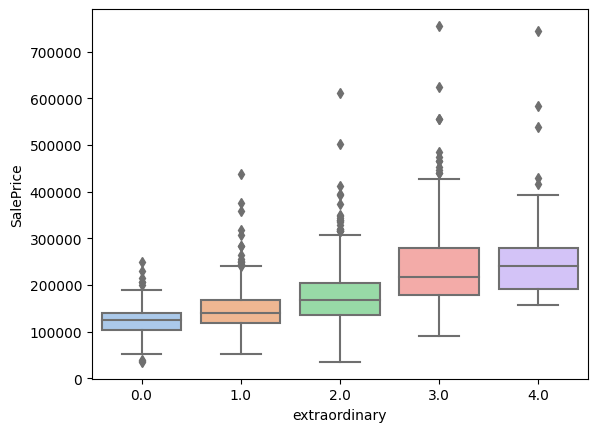

In [14]:
sns.boxplot(x='extraordinary', y='SalePrice', data=train_data_preproc)

Even after removing low variance and highly correlated features, there is a lot of features that have an impact on SalePrices. Since it is hard to make a conculsions using such a big data bunch, first of all select the most important features. For this:

1. HANDLE MISSING VALUES

Replace numerical missing values with mean and categorical with mode using SimpleImputer

2. ENCODE NUMERICAL DATA

Make OneHotEncoding for binary features and LabelEncoding for the rest

3. FIND IMPORTANT FEATURES

Find mostly correlated features with Sale Prices using correlation coef. 

Perform RFE using RandomForestRegressor

Unite output of previous steps into selected feature list.

### HANDLE MISSING VALUES

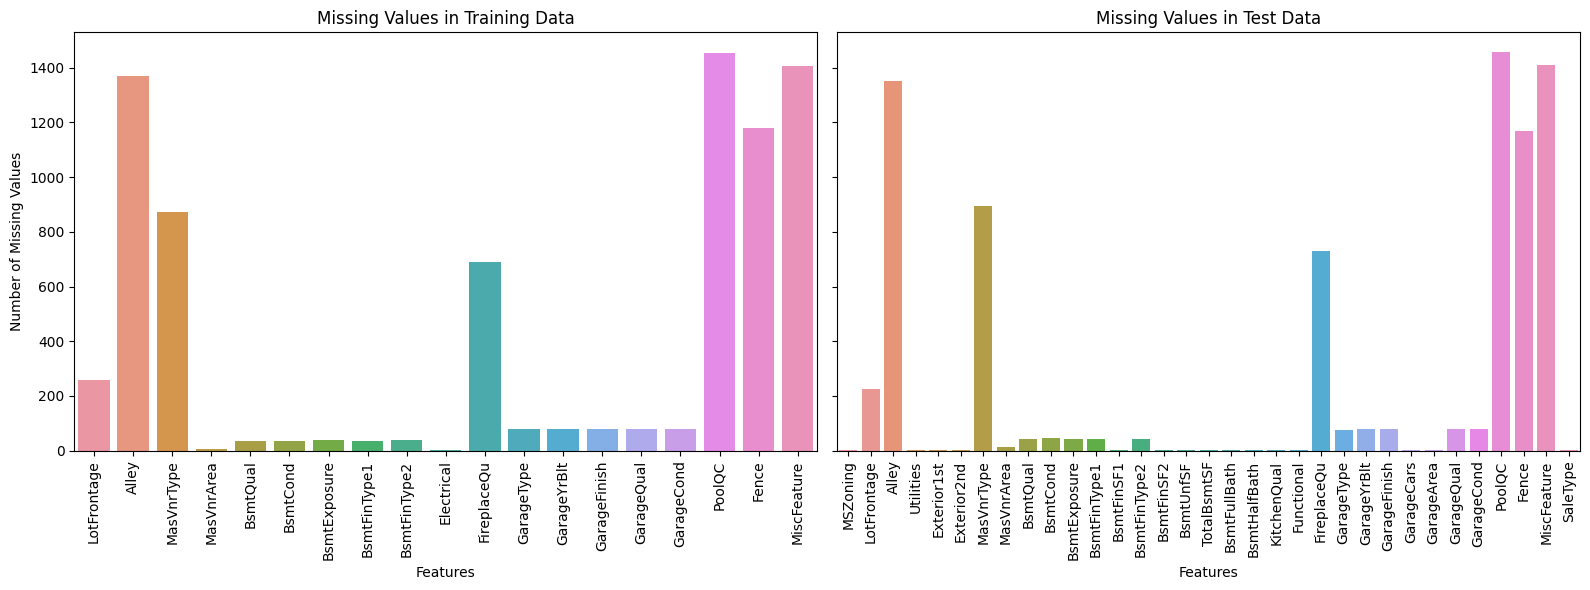

In [15]:
# Calculate the number of missing values for each column in train data
train_missing_values = train_data.isnull().sum()
train_missing_columns = train_missing_values[train_missing_values > 0]

# Calculate the number of missing values for each column in test data
test_missing_values = test_data.isnull().sum()
test_missing_columns = test_missing_values[test_missing_values > 0]

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for the training data
sns.barplot(x=train_missing_columns.index, y=train_missing_columns.values, ax=ax[0])
ax[0].set_title('Missing Values in Training Data')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Number of Missing Values')
ax[0].tick_params(axis='x', rotation=90)

# Plot for the test data
sns.barplot(x=test_missing_columns.index, y=test_missing_columns.values, ax=ax[1])
ax[1].set_title('Missing Values in Test Data')
ax[1].set_xlabel('Features')
ax[1].tick_params(axis='x', rotation=90)

# Show the plots
plt.tight_layout()
plt.show()

In [16]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_columns = train_data_preproc.select_dtypes(include=['int64', 'float64']).columns
numerical_columns_test = test_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = train_data_preproc.select_dtypes(include=['object']).columns

# Impute missing values for numerical features with mean
numerical_imputer = SimpleImputer(strategy='mean')
train_data_numerical = pd.DataFrame(numerical_imputer.fit_transform(train_data_preproc[numerical_columns]), columns=numerical_columns)
test_data_numerical = pd.DataFrame(numerical_imputer.fit_transform(test_data[numerical_columns_test]), columns=numerical_columns_test)

# Impute missing values for categorical features with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data_categorical = pd.DataFrame(categorical_imputer.fit_transform(train_data_preproc[categorical_columns]), columns=categorical_columns)
test_data_categorical = pd.DataFrame(categorical_imputer.fit_transform(test_data[categorical_columns]), columns=categorical_columns)

# Combine numerical and categorical DataFrames
train_data_preproc = pd.concat([train_data_numerical, train_data_categorical], axis=1)
test_data_preproc = pd.concat([test_data_numerical, test_data_categorical], axis=1)

# Check for any remaining missing values
missing_values_count = train_data_preproc.isnull().sum().sum()
print(f"Total missing values after imputation in train data: {missing_values_count}")

missing_values_count = test_data_preproc.isnull().sum().sum()
print(f"Total missing values after imputation test data: {missing_values_count}")

Total missing values after imputation in train data: 0
Total missing values after imputation test data: 0


In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify binary categorical features
binary_categorical_features = [col for col in categorical_columns if train_data_preproc[col].nunique() == 2]
other_categorical_features = [col for col in categorical_columns if train_data_preproc[col].nunique() > 2]

binary_categorical_features

['Street', 'Alley', 'Utilities', 'CentralAir']

In [18]:
# OneHotEncode binary categorical features
one_hot_encoder = OneHotEncoder(drop='if_binary', sparse=False)
encoded_binary_features = one_hot_encoder.fit_transform(train_data_preproc[binary_categorical_features])
encoded_binary_features = encoded_binary_features.astype(int)
encoded_binary_features_df = pd.DataFrame(encoded_binary_features, columns=one_hot_encoder.get_feature_names_out(binary_categorical_features))

In [19]:
encoded_binary_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Street_Pave       1460 non-null   int64
 1   Alley_Pave        1460 non-null   int64
 2   Utilities_NoSeWa  1460 non-null   int64
 3   CentralAir_Y      1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [20]:
# LabelEncode other categorical features
label_encoders = {}
encoded_other_features_df = pd.DataFrame()

for col in other_categorical_features:
    le = LabelEncoder()
    train_data_preproc[col] = le.fit_transform(train_data_preproc[col])
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    encoded_other_features_df[col] = train_data_preproc[col]

# Combine encoded categorical features and numerical features
train_data_preproc = pd.concat([encoded_binary_features_df, encoded_other_features_df, train_data_preproc[numerical_columns]], axis=1)

# Print label encoders dictionary
print("Label encoders dictionary:")
for col, mapping in label_encoders.items():
    print(f"{col}: {mapping}")

Label encoders dictionary:
MSZoning: {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
LotShape: {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
LandContour: {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
LotConfig: {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
LandSlope: {'Gtl': 0, 'Mod': 1, 'Sev': 2}
Neighborhood: {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
Condition1: {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}
Condition2: {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNn': 7}
BldgType: {'1Fam': 0, '2fmCon': 1, 'Duplex': 2, 'Twnhs': 3, 'TwnhsE': 4}
HouseStyle: {'1.5Fin': 0, '1.5

Perform the same steps for test data:


In [21]:
binary_categorical_features = [col for col in categorical_columns if test_data_preproc[col].nunique() == 2]
other_categorical_features = [col for col in categorical_columns if test_data_preproc[col].nunique() > 2]

encoded_binary_features = one_hot_encoder.fit_transform(test_data_preproc[binary_categorical_features])
encoded_binary_features = encoded_binary_features.astype(int)
encoded_binary_features_df = pd.DataFrame(encoded_binary_features, columns=one_hot_encoder.get_feature_names_out(binary_categorical_features))

# LabelEncode other categorical features
encoded_other_features_df = pd.DataFrame()

for col in other_categorical_features:
    le = LabelEncoder()
    test_data_preproc[col] = le.fit_transform(test_data_preproc[col])
    encoded_other_features_df[col] = test_data_preproc[col]

# Combine encoded categorical features and numerical features
test_data_preproc = pd.concat([encoded_binary_features_df, encoded_other_features_df, test_data_preproc[numerical_columns_test]], axis=1)

In [22]:
train_data_preproc.head(5)

,Street_Pave,Alley_Pave,Utilities_NoSeWa,CentralAir_Y,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,extraordinary
0,1,0,0,1,3,3,3,4,0,5,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0,1.0
1,1,0,0,1,3,3,3,2,0,24,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0,2.0
2,1,0,0,1,3,0,3,4,0,5,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0,2.0
3,1,0,0,1,3,0,3,0,0,6,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0,3.0
4,1,0,0,1,3,0,3,2,0,15,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0,3.0


In [23]:
test_data_preproc.head(5)

,Street_Pave,Alley_Pave,CentralAir_Y,PoolQC_Gd,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,extraordinary
0,1,0,1,0,2,3,3,4,0,12,...,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,2.0
1,1,0,1,0,3,0,3,0,0,12,...,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,2.0
2,1,0,1,0,3,0,3,4,0,8,...,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,3.0
3,1,0,1,0,3,0,3,4,0,8,...,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,3.0
4,1,0,1,0,3,0,1,4,0,22,...,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,2.0


In [24]:
print(f"Train size: {train_data_preproc.shape}")
print(f"Test size: {test_data_preproc.shape}")

Train size: (1460, 76)
Test size: (1459, 80)


In [25]:
# Get the columns present in the training dataset
train_col = train_data_preproc.columns

# Get the columns present in the testing dataset
test_col = test_data_preproc.columns

# Identify the columns missing in the testing dataset
missing_columns = train_col.difference(test_col)

# Print the missing columns
print("Columns missing in test_data compared to train_data:")
print(missing_columns)


Columns missing in test_data compared to train_data:
Index(['PoolQC', 'SalePrice', 'Utilities_NoSeWa'], dtype='object')


### Correlation matrix

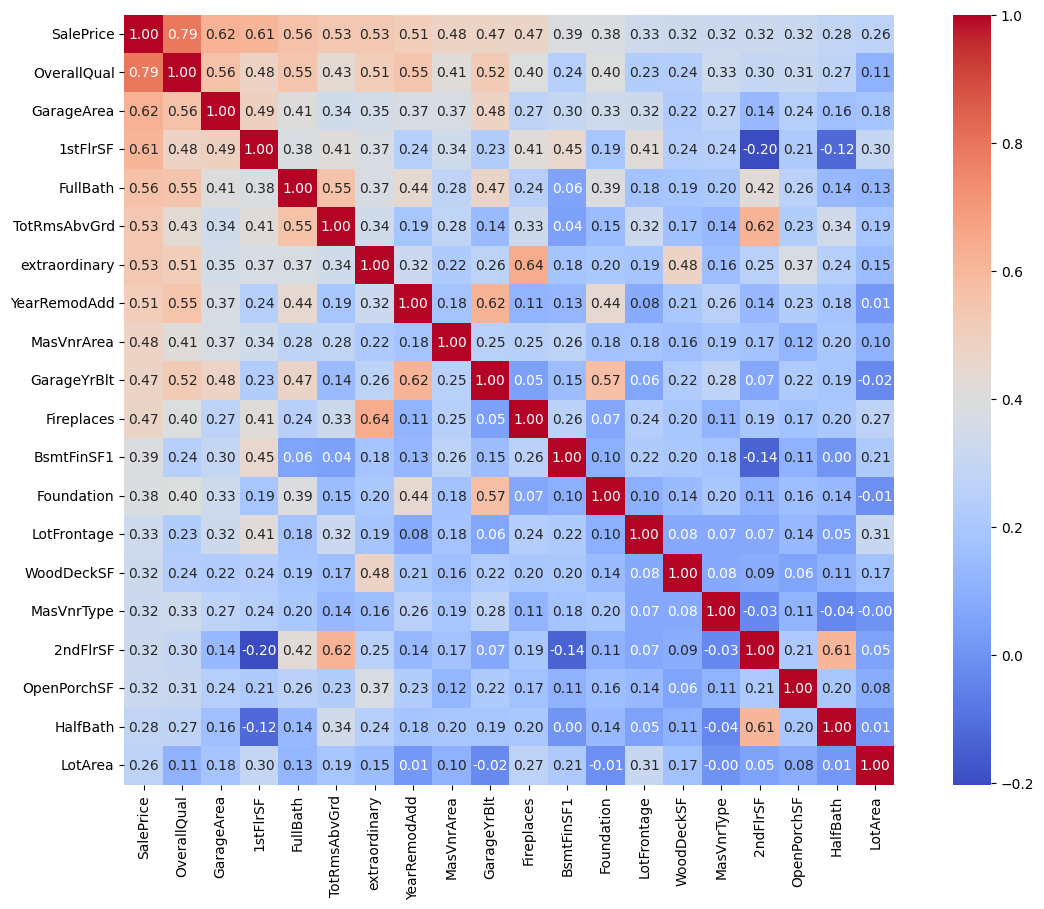

In [26]:
k = 20 #number of variables for heatmap
correlation_matrix = train_data_preproc.corr()
most_correlated = correlation_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data_preproc[most_correlated].values.T)
plt.figure(figsize=(15, 10)) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', cmap='coolwarm', annot_kws={'size': 10}, yticklabels=most_correlated.values, xticklabels=most_correlated.values)
plt.show()


### RFE

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

make_RFE = 1

# Perform Recursive Feature Elimination (RFE) with Random Forest Regressor
X = train_data_preproc.drop(columns=['SalePrice'])
y = train_data_preproc['SalePrice']
rf_regressor = RandomForestRegressor()
lr_regressor = LinearRegression()
if(make_RFE):
    rfe = RFE(estimator=rf_regressor, n_features_to_select=20)  # Adjust the number of features as needed
    rfe.fit(X, y)
    most_correlated_rfe = X.columns[rfe.support_]
    most_correlated_rfe
else:
    most_correlated_rfe = pd.Index([])
    print("RFE not done, other feature selection metod has to be chosen")

In [28]:
print("20 selected most important features according to RFE:")
most_correlated_rfe
print("20 selected most important features according to correlation matrix:")
most_correlated

20 selected most important features according to RFE:
20 selected most important features according to correlation matrix:


Index(['SalePrice', 'OverallQual', 'GarageArea', '1stFlrSF', 'FullBath',
       'TotRmsAbvGrd', 'extraordinary', 'YearRemodAdd', 'MasVnrArea',
       'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1', 'Foundation', 'LotFrontage',
       'WoodDeckSF', 'MasVnrType', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea'],
      dtype='object')

In the 1970s, Hirotugu Akaike, the eminent Japanese statistician, developed a metric called AIC (Akaike’s Information Criteria) that penalizes adding terms to a model. In the case of regression, AIC has the form:

> AIC = 2P + n log(RSS/n)


where P is the number of variables and n is the number of records. The goal is to find the model that minimizes AIC; models with k more extra variables are penalized by 2k.

In the next step the features will be selected basing on mimiization of AIC and stepwise regression from dbma package:


In [29]:
from sklearn.linear_model import LinearRegression
from dmba import stepwise_selection, AIC_score

make_aic_selection = 1

if(make_aic_selection):
    y = train_data_preproc['SalePrice']
    X = train_data_preproc.drop(columns=['SalePrice'])

    def train_model(variables):
        if len(variables) == 0:
            return None
        model = LinearRegression()
        model.fit(X[variables], y)
        return model

    def score_model(model, variables):
        if len(variables) == 0:
            return AIC_score(y, [y.mean()] * len(y), model, df=1)
        return AIC_score(y, model.predict(X[variables]), model)

    best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose=True)

    print(f'Intercept: {best_model.intercept_:.3f}')
    print('Coefficients:')
    for name, coef in zip(best_variables, best_model.coef_):
        print(f' {name}: {coef}')
    minimum_aic_features = pd.Index(best_variables)
else:
    minimum_aic_features = pd.Index([])
    print("Stepwise regression not done, other feature selection metod has to be chosen")
    

no display found. Using non-interactive Agg backend
Variables: Street_Pave, Alley_Pave, Utilities_NoSeWa, CentralAir_Y, MSZoning, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition, Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, extraordinary
Start: score=37092.04, constant
Step: score=35659.49, 

Now compare feature lists selected accoring to various methods:

In [30]:
# Convert to sets for easy comparison
set_aic = set(minimum_aic_features)
set_corr = set(most_correlated)
set_rfe = set(most_correlated_rfe)

# Number of elements in each list
num_aic = len(set_aic)
num_corr = len(set_corr)
num_rfe = len(set_rfe)

# Common elements in each list
common_aic_corr = set_aic & set_corr
common_aic_rfe = set_aic & set_rfe
common_corr_rfe = set_corr & set_rfe

# Common elements across all lists
common_all = set_aic & set_corr & set_rfe

# Unique elements in each list
unique_aic = set_aic - (set_corr | set_rfe)
unique_corr = set_corr - (set_aic | set_rfe)
unique_rfe = set_rfe - (set_aic | set_corr)

# Print results
print(f'Number of elements in minimum_aic_features: {num_aic}')
print(f'Number of elements in most_correlated (defined by user) : {num_corr}')
print(f'Number of elements in most_correlated_rfe (defined by user): {num_rfe}')
print('\n')

print(f'Common elements between minimum_aic_features and most_correlated: \n {common_aic_corr}')
print(f'Common elements between minimum_aic_features and most_correlated_rfe: \n {common_aic_rfe}')
print(f'Common elements between most_correlated and most_correlated_rfe: \n {common_corr_rfe}')
print(f'Common elements in all three lists: {common_all}')
print('\n')

print(f'Unique elements in minimum_aic_features: {unique_aic}')
print(f'Unique elements in most_correlated: {unique_corr}')
print(f'Unique elements in most_correlated_rfe: {unique_rfe}')
print('\n')

# Additional analysis: Percentage of common elements in each pair
if len(set_aic) != 0:
    percent_common_aic_corr = len(common_aic_corr) / len(set_aic) * 100
else:
    percent_common_aic_corr = 0

if len(set_aic) != 0:
    percent_common_aic_rfe = len(common_aic_rfe) / len(set_aic) * 100
else:
    percent_common_aic_rfe = 0

if len(set_corr) != 0:
    percent_common_corr_rfe = len(common_corr_rfe) / len(set_corr) * 100
else:
    percent_common_corr_rfe = 0

print(f'Percentage of common elements in minimum_aic_features and most_correlated: {percent_common_aic_corr:.2f}%')
print(f'Percentage of common elements in minimum_aic_features and most_correlated_rfe: {percent_common_aic_rfe:.2f}%')
print(f'Percentage of common elements in most_correlated and most_correlated_rfe: {percent_common_corr_rfe:.2f}%')
print('\n')


Number of elements in minimum_aic_features: 44
Number of elements in most_correlated (defined by user) : 20
Number of elements in most_correlated_rfe (defined by user): 20


Common elements between minimum_aic_features and most_correlated: 
 {'GarageYrBlt', '1stFlrSF', 'GarageArea', 'LotArea', 'WoodDeckSF', 'TotRmsAbvGrd', 'FullBath', '2ndFlrSF', 'BsmtFinSF1', 'MasVnrArea', 'Fireplaces', 'LotFrontage', 'OverallQual', 'extraordinary'}
Common elements between minimum_aic_features and most_correlated_rfe: 
 {'GarageYrBlt', '1stFlrSF', 'GarageArea', 'Neighborhood', 'LotArea', 'WoodDeckSF', 'TotRmsAbvGrd', 'FullBath', '2ndFlrSF', 'OverallCond', 'BsmtFinSF1', 'MasVnrArea', 'GarageFinish', 'Fireplaces', 'LotFrontage', 'OverallQual'}
Common elements between most_correlated and most_correlated_rfe: 
 {'GarageYrBlt', '1stFlrSF', 'GarageArea', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'TotRmsAbvGrd', 'FullBath', '2ndFlrSF', 'OpenPorchSF', 'BsmtFinSF1', 'MasVnrArea', 'Fireplaces', 'LotFrontage', 'O

In [31]:
# 1 for selected features only coming from correlation matrix
# 2 for selected features only coming RFE
# 3 for selected being union of previous two
# 4 common for 1,2 and 4
# 5 stepwise regression
# 6 something else?

sel_features = 5

if(sel_features==1):
    selected_features = most_correlated
elif(sel_features==2):
    selected_features = most_correlated_rfe
elif(sel_features==3):
    selected_features = most_correlated_rfe.union(most_correlated)
elif(sel_features==4):
    features_list = list(common_all)
    selected_features = pd.Index(features_list)
elif(sel_features==5):
    selected_features = minimum_aic_features
elif(sel_features==6):
    features_list = ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'FullBath', 'GarageArea', 'LotArea', 'OverallQual', 'TotRmsAbvGrd', 'YearRemodAdd']
    selected_features = most_correlated.union(features_list)
else:
    features_list = []
    selected_features = pd.Index(features_list)
    print("WARNING! Selected features are empty list")
    
if 'SalePrice' in selected_features:
    selected_features = selected_features.drop('SalePrice')

#Some issue with these features to be fixed
if 'PoolQC' in selected_features:
    selected_features = selected_features.drop('PoolQC')
if 'Utilities_NoSeWa' in selected_features:
    selected_features = selected_features.drop('Utilities_NoSeWa')

selected_features


Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'BsmtQual', 'BsmtFinSF1',
       'KitchenQual', 'MSSubClass', 'GarageArea', 'BsmtExposure', 'ExterQual',
       'LotArea', 'MasVnrArea', 'OverallCond', 'Fireplaces', 'GarageYrBlt',
       'PoolArea', 'RoofMatl', 'Functional', 'SaleCondition', 'LotFrontage',
       'BsmtFullBath', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch',
       'Street_Pave', 'Neighborhood', 'Condition2', 'TotRmsAbvGrd',
       'GarageFinish', 'BsmtCond', 'Exterior1st', 'HeatingQC', 'BsmtFinType1',
       'BedroomAbvGr', 'FullBath', 'FireplaceQu', 'LotShape', 'LandContour',
       'YrSold', 'extraordinary', 'LandSlope', 'RoofStyle'],
      dtype='object')

In [32]:
train_data_selected = train_data_preproc[selected_features]
test_data_selected = test_data_preproc[selected_features]

In [33]:
test_data_selected = test_data_preproc[selected_features]

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plot_summary = 1
features = len(selected_features)

if plot_summary:
    # Create subplots
    fig, axes = plt.subplots(features, 3, figsize=(20, 4*features))

    # Iterate through each feature
    for i, feature in enumerate(selected_features):
        row_index = i

        # Check if the feature exists in the dataframe
        if feature not in train_data_selected.columns:
            print(f"Warning: Feature '{feature}' does not exist in the dataframe.")
            continue

        print(f"Plotting: {i}. {feature}")

        try:
            # Check if the feature is float
            if train_data_selected[feature].dtype == 'float':
                # Histogram with distribution plot
                sns.histplot(train_data_selected[feature], kde=True, ax=axes[row_index][0])
                axes[row_index][0].set_title(f'{feature} - Histogram with Distribution Plot')

                # Scatter plot
                sns.scatterplot(x=feature, y=y, data=train_data_selected, ax=axes[row_index][1])
                axes[row_index][1].set_title(f'{feature} - Scatter Plot')

                # Probability plot
                stats.probplot(train_data_selected[feature], plot=axes[row_index][2])
                axes[row_index][2].set_title(f'{feature} - Probability Plot')

            # Check if the feature is int
            elif train_data_selected[feature].dtype == 'int':
                # Histogram with distribution plot
                sns.histplot(train_data_selected[feature], kde=True, ax=axes[row_index][0])
                axes[row_index][0].set_title(f'{feature} - Histogram with Distribution Plot')

                # Count plot
                sns.countplot(x=feature, data=train_data_selected, ax=axes[row_index][1])
                axes[row_index][1].set_title(f'{feature} - Count Plot')

                # Box plot
                sns.boxplot(x=feature, y=y, data=train_data_selected, ax=axes[row_index][2])
                axes[row_index][2].set_title(f'{feature} - Box Plot')
        except Exception as e:
            print(f"Error plotting feature '{feature}': {e}")

    # Adjust layout and show plots
    plt.tight_layout()
    plt.show()

else:
    print("Plot summary is off.")


# MODEL TRAINING AND EVALUATION

This data set is for test and learn purposes, thus several 

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import numpy as np

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_data_selected, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform scaler on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)


test_linearregression = 1
test_penatly = 1
test_randomforest = 1

models = {}

if test_linearregression:
    models['Linear Regression'] = LinearRegression()

if test_penatly:
    models['Ridge'] = Ridge()
    models['Lasso'] = Lasso()
    models['ElasticNet'] = ElasticNet()

if test_randomforest:
    models['Random Forest'] = RandomForestRegressor()

# Define parameters for grid search
params = {
    'Linear Regression': {'fit_intercept': [False, True]},
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 30, 50]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0, 30, 50]},
    'ElasticNet': {'alpha': [0.1, 1.0, 10.0, 30, 50], 'l1_ratio': [0.1, 0.5, 0.9]},  # Add parameters for ElasticNet
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]},
}

# Store results
results = {}

# Perform cross-validation and grid search for each model
for name, model in models.items():
    print(f"Model: {name}")
    
    # Grid search
    if name in params:
        grid_search = GridSearchCV(model, params[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled, y_train)
        best_params = grid_search.best_params_
        print(f"Best Parameters: {best_params}")
        model.set_params(**best_params)
    
    # Cross-validation
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"Cross-Validation RMSE: {rmse_scores}")
    print(f"Mean RMSE: {np.mean(rmse_scores)}")
    print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")
    
    # Calculate R^2 score
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 score: {r2}")
    print()

    # Store results
    results[name] = {
        'Cross-Validation RMSE': rmse_scores,
        'Mean RMSE': np.mean(rmse_scores),
        'Standard Deviation of RMSE': np.std(rmse_scores),
        'R^2 score': r2
    }

        # Plot results
    plt.figure(figsize=(7, 3))

    # First subplot: Scatter plot of predicted values vs. residuals

    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, y_test - y_pred)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')    
    #if(name == 'Random Forest'):
    #    plt.ylim(-100,10000)
    plt.title(f'{name} - Residual Plot')
    plt.axhline(y=0, color='r', linestyle='-')

    # Second subplot: Histogram of residuals
    plt.subplot(1, 2, 2)
    plt.hist(y_test - y_pred, bins=20)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    #plt.xlim(-10,10)
    plt.title(f'{name} - Residual Histogram')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

Model: Linear Regression
Best Parameters: {'fit_intercept': True}
Cross-Validation RMSE: [37468.3472626  35395.56884701 49240.68718128 26447.9133937
 24587.96072424]
Mean RMSE: 34628.0954817638
Standard Deviation of RMSE: 8830.668906316376
R^2 score: 0.8484424353093213

Model: Ridge
Best Parameters: {'alpha': 50}
Cross-Validation RMSE: [37391.60424392 34174.0808054  48304.13594924 26656.01010651
 24816.08949722]
Mean RMSE: 34268.38412045817
Standard Deviation of RMSE: 8414.984708563234
R^2 score: 0.8480945664362765

Model: Lasso
Best Parameters: {'alpha': 50}
Cross-Validation RMSE: [37412.63311779 35314.49595049 49237.49740873 26484.22735877
 24590.47273469]
Mean RMSE: 34607.865314094706
Standard Deviation of RMSE: 8817.412684368168
R^2 score: 0.8483005647678036

Model: ElasticNet
Best Parameters: {'alpha': 1.0, 'l1_ratio': 0.9}
Cross-Validation RMSE: [37304.07048709 33625.29652502 47915.50316651 26875.59517944
 25016.71847652]
Mean RMSE: 34147.43676691647
Standard Deviation of RMSE: 8

Various techniques of feature selection has been tested and also various models. Below the table containing R^2 for different option is presented: 

| Feature Selection | Linear Regression        | Ridge Regression     | Lasso Regression     | Elastic Net         | Random Forest       |
|-------------------|--------------------------|----------------------|----------------------|---------------------|---------------------|
| AIC opt (stepwise)| R² - 84.81% (v7)          | R² - 84.84%          | R² - 84.83%          | R² - 84.69%         | R² - 88.55% (v16)   |
| RFE (using RF)    | R² - 81.50% (v9)          | R² - 81.51% (v13)    | R² - 81.54% (v13)    | R² - 81.07% (v13)   | R² - 88.53% (v17)   |
| Highest coef      | R² - 81.04% (v10)        | R² - 80.99% (v14)    | R² - 81.46% (v14)    | R² - 80.56% (v14)   | R² - 88.44% (v17)   |
| Common features   | R² - 80.08% (v11)        | R² - 80.77% (v12)    | R² - 80.08% (v12)    | R² - 80.29% (v12)   | R² - 87.46% (v19)   |


**> Best score: Random Forest using stepwise regression with AIC minimization for feature selection** (also best results in competiton, tested on test_data dataset)

In [55]:
plt.figure(figsize=(5, 3))
for name, result in results.items():
    if(name=='Random Forest'):
        continue
    plt.bar(name, result['Mean RMSE'], label=name)
plt.xlabel('Regression Model')
plt.ylabel('Mean RMSE')
plt.ylim(37000,38000)
plt.title('Mean RMSE for Different Regression Models')
plt.legend()
plt.show()

# Plot R^2 score for each model
plt.figure(figsize=(5, 3))
for name, result in results.items():
    plt.bar(name, result['R^2 score'], label=name)
plt.xlabel('Regression Model')
plt.ylabel('R^2 score')
plt.ylim(0.80,0.88)
plt.title('R^2 Score for Different Regression Models')
plt.legend()
plt.show()

The best model is:

In [37]:
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=20)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree

# Assuming best_model, train_data_selected, 'SalePrice', and selected_features are defined
# Train the model if not already trained
#best_model.fit(train_data_selected[selected_features], train_data_selected['SalePrice'])

# Generate Feature Importances Plot
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[indices], y=np.array(selected_features)[indices], palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# Generate Permutation Importance Plot
perm_importance = permutation_importance(best_model, train_data_selected[selected_features], y, n_repeats=10, random_state=0)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=np.array(selected_features)[sorted_idx])
plt.title('Permutation Importances (train set)')
plt.xlabel('Decrease in score')
plt.show()

# Plot a Decision Tree from the Random Forest
# Note: Random Forests consist of multiple decision trees, here we are plotting only one of them
plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], feature_names=selected_features, filled=True, max_depth=3, fontsize=10)
plt.title('Decision Tree from Random Forest')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming best_model, train_data_selected, 'SalePrice', and selected_features are defined
X = train_data_selected[selected_features]
y = train_data_selected['SalePrice']
y_pred = best_model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

# Plot metrics
metrics = {'MSE': mse, 'MAE': mae, 'R²': r2, 'RMSE': rmse}
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(metrics.keys()), list(metrics.values()), color='skyblue')
ax.set_xlabel('Score')
ax.set_title('Regression Metrics for Best Model')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted SalePrice')
plt.show()


KeyError: 'SalePrice'

# Saving output for test_data

In [ ]:
selected_features

In [ ]:
# Check for any NaN values
has_nan = test_data_selected.isna().any().any()
print("DataFrame has NaN values:", has_nan)

In [ ]:
test_data_selected.head()

In [ ]:
test_data_scaled = scaler.transform(test_data_selected[selected_features])

# Predict SalePrice using the best_model
predicted_sale_price = best_model.predict(test_data_scaled)

# Create a dataframe with Id and predicted SalePrice
predicted_df = pd.DataFrame({
    'Id': test_data_preproc['Id'],  # Assuming 'Id' is the index of the DataFrame
    'SalePrice': predicted_sale_price
})

# Ensure 'Id' is saved as an integer
predicted_df['Id'] = predicted_df['Id'].astype(int)

# Save the dataframe to a CSV file
predicted_df.to_csv('submission.csv', index=False)

# Display the dataframe
predicted_df.head(5)

# Conculsions

In this notebook, we explored advanced regression techniques to analyze the House Pricing dataset. Our objective was to build predictive models to estimate house prices based on various features. Here are the key points and findings from our analysis:

> **Data Preprocessing:**

We started by cleaning the dataset, handling missing values, and encoding categorical variables.
Feature engineering was performed to create meaningful variables, such as the extraordinary feature, which captures the presence of extraordinary home features like pools, porches, and fireplaces.

> **Feature Selection:**

Low variance and high correlated features have been removed.
Multiple feature selection methods were employed, including AIC optimization (stepwise selection), Recursive Feature Elimination (RFE), and selecting the highest correlated features.
We identified common and unique features from these different methods to ensure a robust feature set for modeling.

> **Model Training and Evaluation:**

Several regression models were trained, including Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, and Random Forest.
Hyperparameter tuning was performed using grid search to find the best parameters for each model.
Various feature sets influence of model preformance has been tested.

> **Model Comparison:**

    * Linear Regression:

       Achieved an R² of 84.8% using stepwise regression feature selection.
       Other feature selection methods also produced strong results with slight variations.

    * Penalty Models (Ridge, Lasso, Elastic Net):

       Showed similar performance with R² around 84.8% for stepwise regression.
       Ridge and Lasso performed slightly better in some feature selection methods compared to Elastic Net.

    * Random Forest:
        Demonstrated the best performance with an R² of 88.55% using stepwise regression.
        Consistently performed well across all feature selection methods, highlighting its robustness in handling complex data relationships.

> Feature Importance:

Feature importance was analyzed using both the inherent feature importance from Random Forest and permutation importance.
Visualizations highlighted the most significant features contributing to the model predictions.

> Visualization and Interpretation:

Histograms, probability plots and bar plots were used to visialise features distributions.
Scatter plots and hexbin plots were used to visualize relationships between features and house prices.
Decision trees from the Random Forest model were plotted to understand the decision-making process of the model.

> Metrics and Performance:

For regression models, metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), R², and Root Mean Squared Error (RMSE) were calculated.
AIC parameter was used to find best features.


The analysis demonstrated the effectiveness of advanced regression techniques in predicting house prices. Random Forest emerged as the most robust model, providing high accuracy and consistency across different feature selection methods. The combination of thorough data preprocessing, feature engineering, and rigorous model evaluation led to reliable and interpretable models. These models can significantly aid stakeholders in making informed decisions in the real estate market.

Future work could explore additional advanced techniques such as boosting algorithms, deep learning models, and incorporating external data sources to further enhance the predictive power and applicability of the models.

### Best model: Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Assuming best_model, train_data_selected, 'SalePrice', and selected_features are defined
#X = X_train_scaled
#y_pred = best_model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot accuracy
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(['Accuracy'], [accuracy], color='skyblue')
ax.set_ylim(0, 1)
ax.set_ylabel('Score')
ax.set_title('Accuracy for Best Model')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print('Classification Report:')
print(classification_report(y, y_pred))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree

# Assuming best_model, train_data_selected, 'SalePrice', and selected_features are defined
# Train the model if not already trained
#best_model.fit(train_data_selected[selected_features], train_data_selected['SalePrice'])

# Generate Feature Importances Plot
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[indices], y=np.array(selected_features)[indices], palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

# Generate Permutation Importance Plot
perm_importance = permutation_importance(best_model, train_data_selected[selected_features], train_data_selected['SalePrice'], n_repeats=10, random_state=0)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(12, 8))
plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=np.array(selected_features)[sorted_idx])
plt.title('Permutation Importances (train set)')
plt.xlabel('Decrease in score')
plt.show()

# Plot a Decision Tree from the Random Forest
# Note: Random Forests consist of multiple decision trees, here we are plotting only one of them
plt.figure(figsize=(20, 10))
plot_tree(best_model.estimators_[0], feature_names=selected_features, filled=True, max_depth=3, fontsize=10)
plt.title('Decision Tree from Random Forest')
plt.show()


### Best model: Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming best_model, train_data_selected, 'SalePrice', and selected_features are defined
X = train_data_selected[selected_features]
y = train_data_selected['SalePrice']
y_pred = best_model.predict(X)

# Calculate metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

# Plot metrics
metrics = {'MSE': mse, 'MAE': mae, 'R²': r2, 'RMSE': rmse}
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(list(metrics.keys()), list(metrics.values()), color='skyblue')
ax.set_xlabel('Score')
ax.set_title('Regression Metrics for Best Model')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted SalePrice')
plt.show()
